# Simple examples
from https://people.duke.edu/~ccc14/sta-663/PyMC3.html

In [6]:
import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
import pymc3 as pm
import numpy as np
from scipy import stats
import tqdm
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

%load_ext version_information

%version_information pymc3, scipy, numpy, seaborn



The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.2 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 6.1.0
OS Darwin 15.6.0 x86_64 i386 64bit
pymc3 3.1
scipy 0.19.1
numpy 1.13.1
seaborn 0.8.0
Tue Oct 03 17:43:16 2017 MDT

# Coin toss
We’ll repeat the example of determining the bias of a coin from observed coin tosses. The likelihood is binomial, and we use a beta prior.




In [18]:
n = 100
h = 61
alpha = 2
beta = 2

niter = 10000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    #no need to assign manually
    #     step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(niter, start=start, random_seed=123, progressbar=True, tune=1000, njobs=5)
    
with pm.Model() as model2: # context management
    # define priors, no information this time
    p = pm.Uniform('p', 0, 1)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    #no need to assign manually
    #     step = pm.Metropolis() # Have a choice of samplers
    trace2 = pm.sample(niter, start=start, random_seed=123, progressbar=True, tune=1000, njobs=5)
    
    

Optimization terminated successfully.
         Current function value: 3.582379
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 5.2237:   2%|▏         | 4305/200000 [00:00<00:18, 10738.25it/s]
Convergence archived at 4900
Interrupted at 4,900 [2%]: Average Loss = 6.5062
100%|██████████| 11000/11000 [00:10<00:00, 1031.59it/s]


Optimization terminated successfully.
         Current function value: 3.941145
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 5.4844:   2%|▏         | 4494/200000 [00:00<00:17, 11314.79it/s]
Convergence archived at 4900
Interrupted at 4,900 [2%]: Average Loss = 6.8189
100%|██████████| 11000/11000 [00:10<00:00, 1087.77it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1213980b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121a337b8>]], dtype=object)

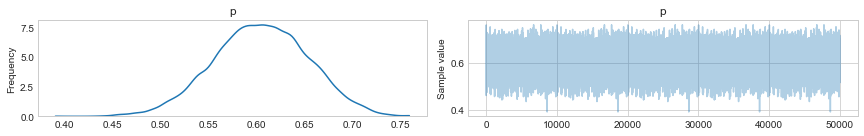

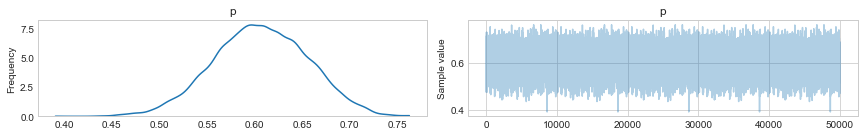

In [19]:
pm.traceplot(trace, combined=True)
pm.traceplot(trace2, combined=True)

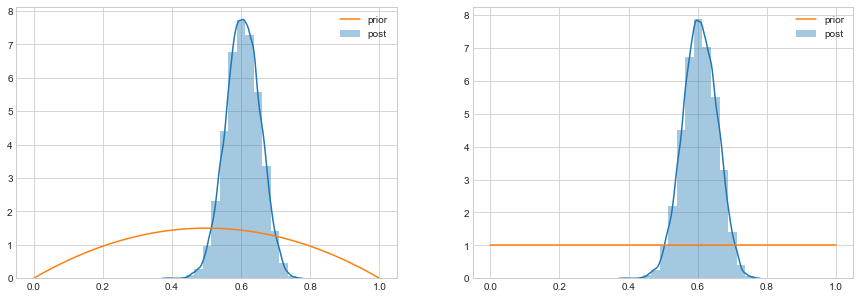

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.distplot(trace['p'], 15, label='post', ax=ax[0]);
x = np.linspace(0, 1, 100)
ax[0].plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
ax[0].legend();

sns.distplot(trace2['p'], 15, label='post', ax=ax[1]);
x = np.linspace(0, 1, 100)
ax[1].plot(x, stats.uniform.pdf(x, ), label='prior');
ax[1].legend();


# Estimating mean and standard deviation of normal distribution

In [55]:
# generate observed data
N = 100
_mu = np.array([10])
_sigma = np.array([2])
y = np.random.normal(_mu, _sigma, N)

niter = 10000
with pm.Model() as model:
    # define priors
    mu = pm.Uniform('mu', lower=0, upper=100, shape=_mu.shape)
    sigma = pm.Uniform('sigma', lower=0, upper=10, shape=_sigma.shape)

    # define likelihood
    y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=y)

    # inference
    start = pm.find_MAP()
    trace = pm.sample(niter, start=start, random_seed=123, progressbar=True, njobs=5)

INFO (theano.gof.compilelock): Refreshing lock /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64bit-i386-3.6.2-64/lock_dir/lock


Optimization terminated successfully.
         Current function value: 216.615282
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 223.92:  10%|█         | 20061/200000 [00:02<00:20, 8970.57it/s]
Convergence archived at 20800
Interrupted at 20,800 [10%]: Average Loss = 722.53
100%|██████████| 10500/10500 [00:14<00:00, 741.58it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128b5c470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120d947b8>]], dtype=object)

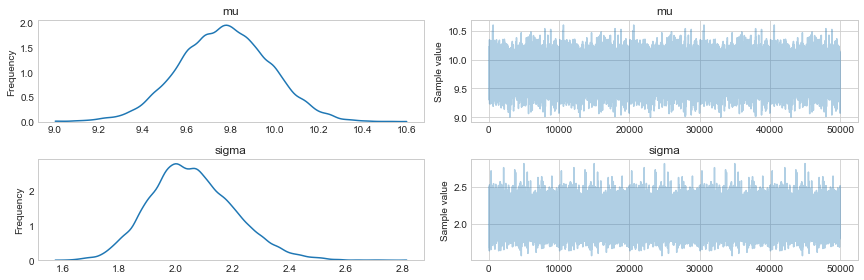

In [56]:
pm.traceplot(trace, combined=True)

In [57]:
pm.summary(trace)


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  9.769            0.206            0.001            [9.373, 10.173]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  9.365          9.630          9.771          9.908          10.168


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.059            0.148            0.001            [1.778, 2.350]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.795          1.957          2.049          2.154          2.370



1.2397748935571247

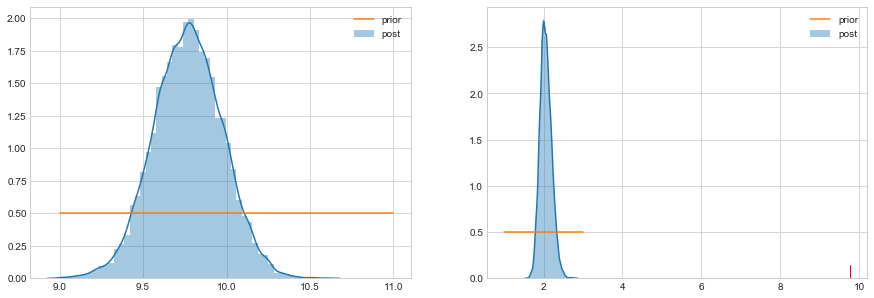

In [63]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.distplot(trace['mu'], label='post', ax=ax[0]);
x = np.linspace(np.floor(trace['mu'].min()), np.ceil(trace['mu'].max()), 100)
ax[0].plot(x, stats.uniform.pdf(x, loc=x.min(), scale=np.ptp(x)), label='prior');
ax[0].legend();

sns.distplot(trace['sigma'], label='post', ax=ax[1]);
x = np.linspace(np.floor(trace['sigma'].min()), np.ceil(trace['sigma'].max()), 100)
ax[1].plot(x, stats.uniform.pdf(x, loc=x.min(), scale=np.ptp(x)), label='prior');
ax[1].legend();
np.ptp(trace['sigma'])

In [64]:
ppc = pm.sample_ppc(trace, samples=500, model=model, size=100)


100%|██████████| 500/500 [00:00<00:00, 625.41it/s]


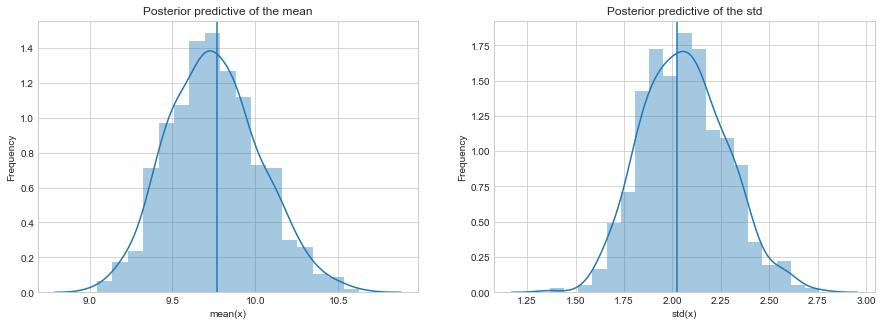

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.distplot([n.mean() for n in ppc['Y_obs']], kde=True, ax=ax[0])
ax[0].axvline(y.mean())
ax[0].set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

sns.distplot([n.std() for n in ppc['Y_obs']], kde=True, ax=ax[1])
ax[1].axvline(y.std())
ax[1].set(title='Posterior predictive of the std', xlabel='std(x)', ylabel='Frequency');